In [500]:
#эпсилон для предела
EPS = 0.0345

#эпсилон для недостижимой точной грани
EPS_inf = 0.7


In [501]:
from matplotlib import pyplot as plt
import numpy as np
from math import floor
#импорт основных библиотек

In [502]:
def func(n):
    return (3-pow(-1,n))*((2*n+5)/(n+2))
#наша последовательность
def subfunc(n):
    return 2*(2*n+5)/(n+2)
#наша подпоследовательность

In [503]:
sup, inf, dlim, ulim = 28/3, 4, 4, 8 #определим данные из аналитического метода (супремум, инфимум, нижний и верхний пределы соответственно)
x, y = [], [] #точки на осях абсцисс/ординат для x
xd, yd = [], [] #то же для подпоследовательности, предел которой равен нижнему пределу x
xd1, yd1, xdl1 = [], [], [] #вспомогательные списки для подпоследовательности
ibeg = 0 #первый индекс
ilim = 100 #последний индекс
mi, ma = 100, 0 #max и min x

In [504]:
#найдём n0 (для предела)

if (int)(2/EPS)==(floor(2/EPS)):
    n0=(int)(2/EPS)-1
else:
    n0=floor(2/EPS)-2
n0=max(n0,0)


In [505]:
#найдём m (для недостижимой точной грани)

if (int)(4/EPS_inf)==(floor(4/EPS_inf)):
    m=(int)(4/EPS_inf)-3
else:
    m=floor(4/EPS_inf)-4
m=max(m,0)
if m%2==1:
    m+=1
if m>ilim:
    ilim=m+m//10


In [506]:
for i in range(ibeg, ilim + 1):
    y.append(func(i)) #добавляем член последовательности с номером i
    if i%2==0:
        yd.append(y[-1]) #добавляем последний добавленный член последовательности
    mi = min(mi, y[-1]) #обновляем min и max
    ma = max(ma, y[-1])

In [507]:
#найдем 100 членов подпоследовательности, начиная с n0
for i in range(n0, n0+101):
    xd1.append(i)
    xdl1.append(i)
    yd1.append(subfunc(i))

In [508]:
#заполним списки значениями для постройки графиков
x=np.arange(ibeg,ilim+1,1)
xd=np.arange(ibeg,ilim+1,2)

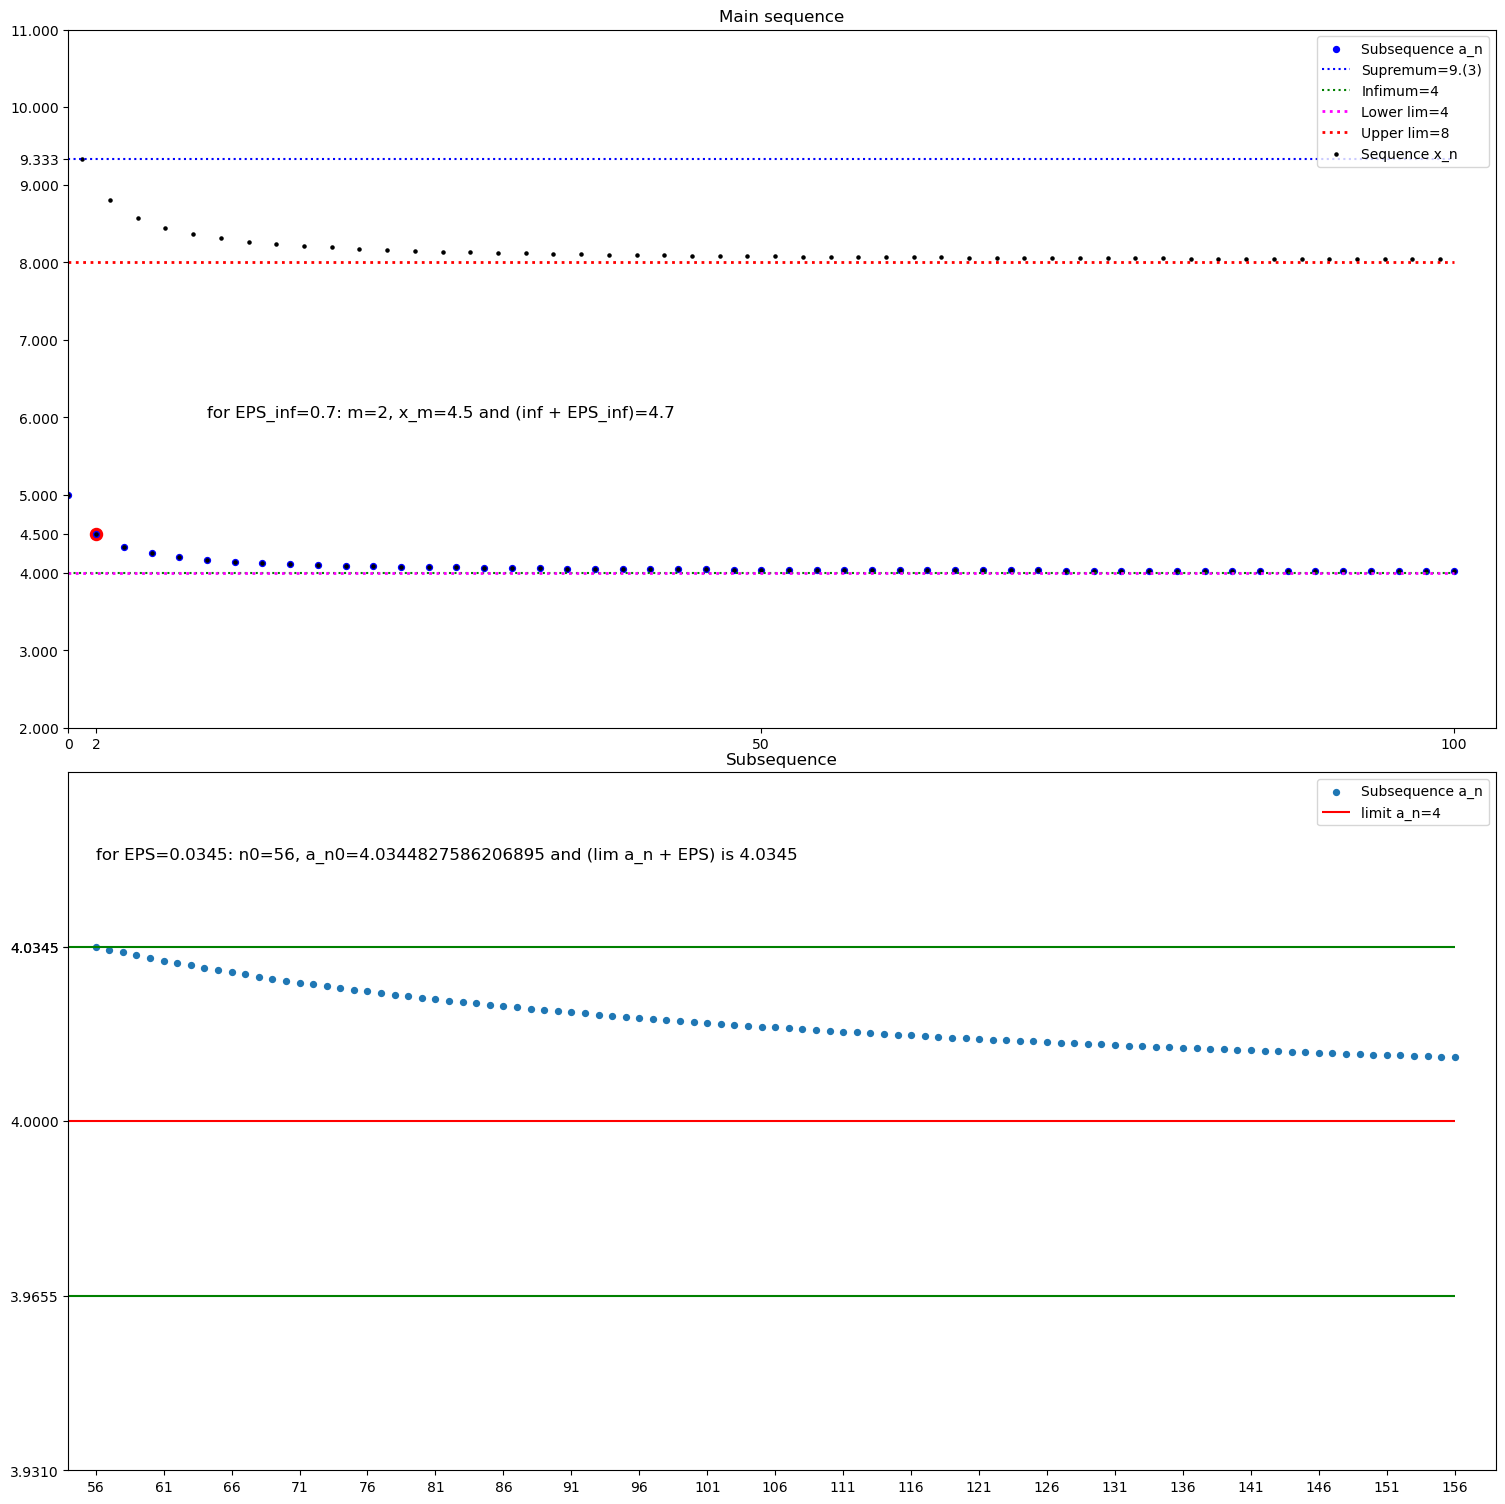

In [509]:
#строим графики
fig, ax = plt.subplots(2,1)
fig.set_figwidth(15)
fig.set_figheight(15)
fig.tight_layout()

#график последовательности
ax[0].set_xlim([ibeg, ilim+ilim//30])
ax[0].set_ylim([mi - 2, ma + 1])
ax[0].set_title("Main sequence")
ax[0].set_xticks(np.array([ibeg,ilim//2,m,ilim]))
ax[0].set_yticks(np.append(np.arange(inf-2,sup+2,1),np.array([func(m),sup])))

#график подпоследовательности, предел которой равен 4
ax[1].set_xlim([n0-2, n0+103])
ax[1].set_ylim([dlim - 2*EPS, dlim + 2*EPS])
ax[1].set_title("Subsequence")
ax[1].set_xticks(np.arange(n0, n0+101, 5))
ax[1].set_yticks(np.append(np.array([dlim-EPS,dlim,dlim+EPS,yd1[0]]),np.arange(dlim-2*EPS,dlim+2*EPS,0.5)))

#разные дизайны и настройки отображения
ax[1].scatter(xd1, yd1, label = 'Subsequence a_n', s = 18)
ax[1].hlines([dlim+EPS,dlim-EPS],[0,0],[xdl1[-1],xdl1[-1]], color="green")
ax[1].hlines(dlim,0,xdl1[-1],color="red",label="limit a_n=4")
ax[1].annotate(("for EPS="+(str)(EPS)+": n0="+(str)(n0)+", a_n0="+(str)(yd1[0])+" and (lim a_n + EPS) is "+(str)(dlim+EPS)), xy=(n0,dlim+EPS*1.5),xytext=(n0,dlim+EPS*1.5), fontsize=12)
ax[1].legend()


ax[0].scatter([m],[func(m)], color="red", s=75)
ax[0].annotate(("for EPS_inf="+(str)(EPS_inf)+": m="+(str)(m)+", x_m="+(str)(func(m))+" and (inf + EPS_inf)="+(str)(inf+EPS_inf)),xy=(10,6),xytext=(10,6),fontsize=12)
ax[0].scatter(xd, yd, color="blue", label = 'Subsequence a_n', s=18)
ax[0].hlines(sup,ibeg,ilim, color="blue",linestyle=":", label="Supremum=9.(3)")
ax[0].hlines(inf,ibeg,ilim, color="green",linestyle=":", label="Infimum=4")
ax[0].hlines(dlim,ibeg,ilim, color="magenta",linestyle=":", label="Lower lim=4", linewidth=2)
ax[0].hlines(ulim,ibeg,ilim, color="red",linestyle=":", label="Upper lim=8", linewidth=2)
ax[0].scatter(x, y, color="black",label = 'Sequence x_n', s=5)
ax[0].legend(loc = 'upper right')
plt.show()  